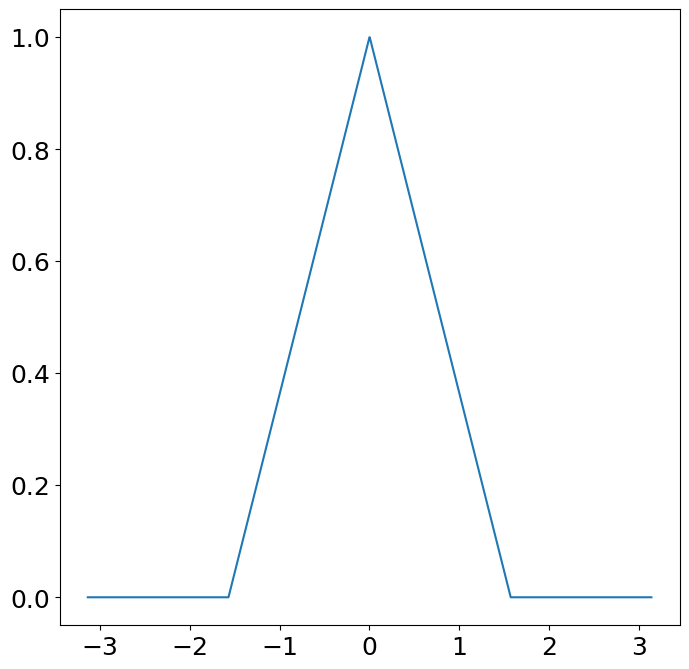

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams.update({'font.size': 18})

# Test function (Hat Function)

dx = 0.001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))

f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

fig, ax = plt.subplots()
ax.plot(x,f)


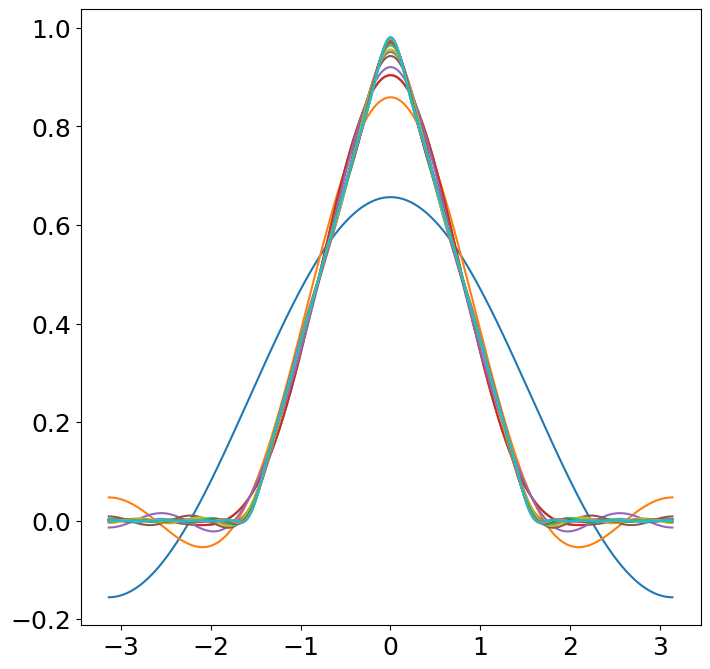

In [17]:
# Compute Fourier Series 
A0 = np.sum(f * np.ones_like(x)) * dx
fFs = A0/2
cutoff = 20

fig2, ax2 = plt.subplots()

A = np.zeros(cutoff)
B = np.zeros(cutoff)
for k in range(cutoff):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFs = fFs + A[k]*np.cos(np.pi*(k+1)*x/L) + B[k]*np.sin(np.pi*(k+1)*x/L)
    ax2.plot(x, fFs)

Text(0.5, 1.0, 'Error')

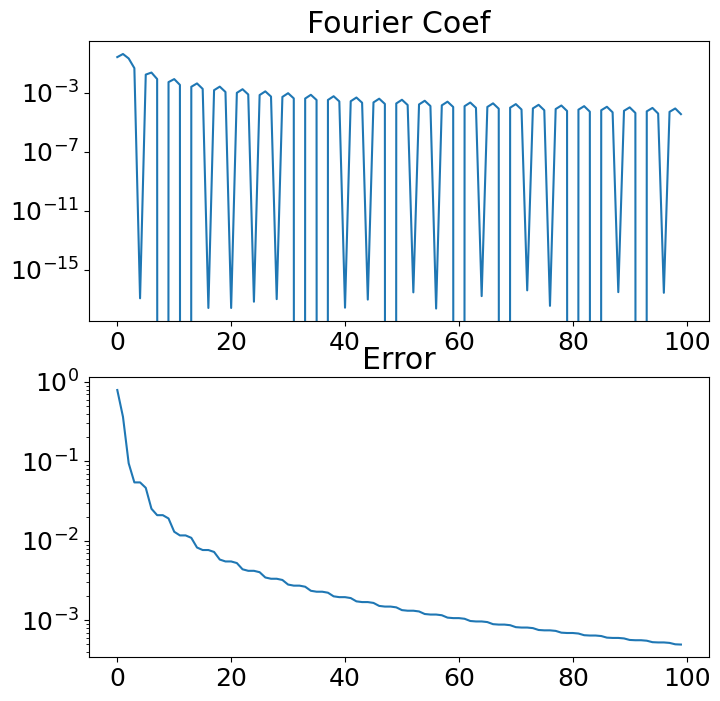

In [23]:
# What is happening to the A, B values?

fFs = (A0/2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
Err = np.zeros(kmax)

A[0] = A0/2
Err[0] = np.linalg.norm(f-fFs)/np.linalg.norm(f)

for k in range (1, kmax):
    A[k] = np.sum(f * np.cos(np.pi*k*x/L)) * dx
    B[k] = np.sum(f * np.sin(np.pi*k*x/L)) * dx
    fFs = fFs + A[k]*np.cos(k*np.pi*x/L) + B[k]*np.sin(k*np.pi*x/L)
    Err[k] = np.linalg.norm(f-fFs)/np.linalg.norm(f)

threshold = np.median(Err) * np.sqrt(kmax) * (4/np.sqrt(3))
r = np.max(np.where(Err > threshold))

fig, axs = plt.subplots(2,1)
axs[0].semilogy(np.arange(kmax),A)
axs[0].semilogy(r, A[r])
axs[0].semilogy(r, B[r])
plt.sca(axs[0])
plt.title('Fourier Coef')

axs[1].semilogy(np.arange(kmax), Err)
axs[1].semilogy(r, Err[r])
plt.sca(axs[1])
plt.title('Error')

# Wonder why it fluctuates back and forth?